 ![screen](https://www.itesca.edu.mx/imgs/logos/logoItescaNombre.png)

 
### INTELIGENCIA ARTIFICIAL

###
# TAREA: FORWARD PROPAGATION

###
#### ALUMNOS:
* Daniels Cárdenas Daniel 18130451
* Valenzuela Nehmad Rafael Pahul 17130124

#### MAESTRO:  
#### José Luis Beltrán Márquez
###
#### Ciudad Obregón, Sonora. Noviembre de 2023

# Código

capa 0 = 2
capa 1 = 1

Vista corta de los datos
   A  B  S
0  0  0  0
1  0  1  0
2  1  0  0
3  1  1  1
Datos= 
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
 N = 2
 X = [[0 0]
 [0 1]
 [1 0]
 [1 1]]
entrada = [0 0]
4
entrada= [0 0]
salida= 1
entrada= [0 1]
salida= 0
entrada= [1 0]
salida= 0
entrada= [1 1]
salida= 1
salidas = [1, 0, 0, 1]
m = 400


C:\Users\admin\AppData\Local\Temp\ipykernel_13592\3914833987.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0,a] = self.neuronas[a].sigmoide(X)
C:\Users\admin\AppData\Local\Temp\ipykernel_13592\3914833987.py:176: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas.append(math.ceil(B))
C:\Users\admin\AppData\Local\Temp\ipykernel_13592\3914833987.py:177: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"salida= {math.ceil(B)}")
C:\Users\admin\AppD

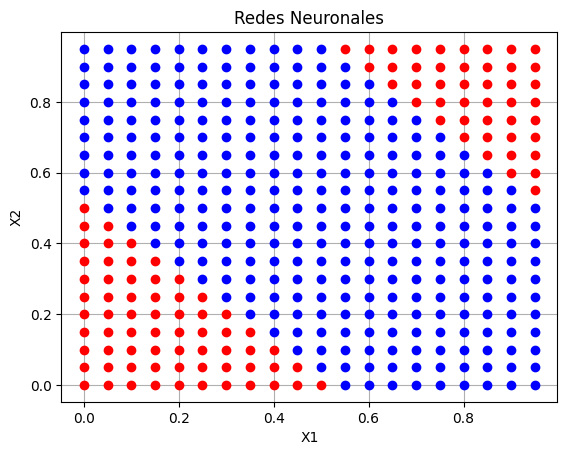

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N,1])
        for a in range(N):
            self.w[a,0] = np.random.randn()*0.1        
    
    def sigmoide(self, X):
        return 1/(1 + np.exp(-(np.dot(X, self.w)+self.b)))
    
    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"
        

class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = []        
        for a in range(neuronas):
            self.neuronas.append(Neurona(entradas))
    
    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0,a] = self.neuronas[a].sigmoide(X)
        return salidas
    
    def backPropagation(self, error):
        a = 1
        
    def __str__(self):
        cadena = ""
        i = 1
        for a in self.neuronas:
            cadena += "Neurona " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
    
class RedNeuronal:
    "ejemplo de llamada seria: RedNeuronal([4,2,1]), donde el 4 es el número de variables de entrada, el 2 es el número de neuronas de la primer capa, y 1 es l capa de salida"
    def __init__(self, capas):
        self.capas = []
        for a in range(len(capas)-1):
            self.capas.append(Capa(capas[a+1], capas[a]))
    
    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
            #print(f"x= {X}")
        return X
    
    def prediccion(self, X):
        m = X.shape[0]
        print(f"m = {m}")
        Y = np.zeros([m,1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a,:])
        return Y
    
    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a,:])
            loss = -(Y[a] * np.log(yp) + (1-Y[a]) * np.log(1-yp))
            costo += loss
        costo /= m
        return costo
    
    def backPropagation(self, X, Y):
        error = self.getCosto(X,Y)

    def getNumCapas(self):
        return len(self.capas)
    
    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(len(self.capas[0].neuronas[0].w)) + " entradas y " + str(len(self.capas)) +" capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa "+ str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
        
        
datos=pd.read_csv('data/and.csv', sep=',')#,header=None)

caracteristicas = pd.read_csv('data/datosForward.csv', sep=',', header=None)
caracteristicas = caracteristicas.to_numpy()
#print(f"caracteristicas = {caracteristicas}")
encabezado = caracteristicas[0,:]
pesos = caracteristicas[1:]
#print(f"pesos= {pesos}")
#print(f"encabezado = {encabezado}")
capas = encabezado[1:]
#print(f"capas = {encabezado[1:]}")
A = RedNeuronal(encabezado)

####################CARGAR DATOS DE LA RED NEURONAL (BIS Y PESOS) ########################
i=0
fila=0
neu=0
for a in range(len(capas)):
    num_neuronas=capas[i]
    print(f"capa {i} = {capas[i]}")
    neu=0
    for b in range(num_neuronas):
        neurona=A.capas[i].neuronas[neu]
        neurona.b=pesos[fila][0]
        neurona.w[0,0]=pesos[fila][1]
        neurona.w[1,0]=pesos[fila][2]
        #print(f"capa {i} neurona {neu}\n")
        #print(f"b ={pesos[fila][0]} w = {pesos[fila][1]} w = {pesos[fila][2]}")
        fila=fila+1
        neu=neu+1
    i=i+1
    
# and
# or
# nor
# xnor
print("\nVista corta de los datos")
print(datos.head())
datos = datos.to_numpy()
print(f"Datos= \n{datos}")
N = datos.shape[1] - 1
print(f" N = {N}")
X = datos[:,0:N]
print(f" X = {X}")
Y = datos[:,N]


####################################################################
#NOR
#neurona = A.capas[0].neuronas[0]
#print(str(A))
#neurona.b = 10
#neurona.w[0,0] = -20
#neurona.w[1,0] = -20

#AND
#neurona = A.capas[0].neuronas[1]
#print(str(A))
#neurona.b = -30
#neurona.w[0,0] = 20
#neurona.w[1,0] = 20

#OR
#neurona = A.capas[1].neuronas[0]
#print(str(A))
#neurona.b = -10
#neurona.w[0,0] = 20
#neurona.w[1,0] = 20
####################################################################

#print(f"\nNeurona programada: \n{neurona}")
entrada = X[0,:]
print(f"entrada = {entrada}")
print(len(X))
i=0
salidas = []
for a in range(len(X)):
    entrada = X[i,:]
    print(f"entrada= {entrada}")
    B = A.forwardPropagation(entrada)
    if(B<0.5):
        salidas.append(math.floor(B))
        print(f"salida= {math.floor(B)}")
    else:
        salidas.append(math.ceil(B))
        print(f"salida= {math.ceil(B)}")
    
    i=i+1
print(f"salidas = {salidas}")
with open("salida.txt", "w") as archivo:
    for elemento in salidas:
        archivo.write(str(elemento) + "\n")



datos=pd.read_csv('data/datosPrueba.csv', sep=',')#,header=None)
#datosPrueba
datos = datos.to_numpy()
N = datos.shape[1] - 1
m = datos.shape[0]
X = datos[:,0:N]
Yp = A.prediccion(X)
#print(f"prediccion= {Y}")

X0 = [j for j in range(m) if Yp[j]<0.5]
X1 = [j for j in range(m) if Yp[j]>=0.5]


plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()
